# Time Series Analysis on the Data: International Airline Passengers from 1949 to 1960

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
# Load the Airline Passengers dataset
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Month', ylabel='#Passengers'>

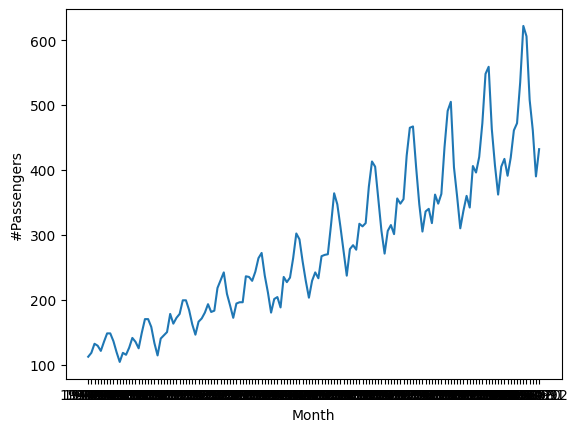

In [6]:
# Plot this dataset to see trends and seasonality with seaborn
sns.lineplot(data=df, x='Month', y='#Passengers')

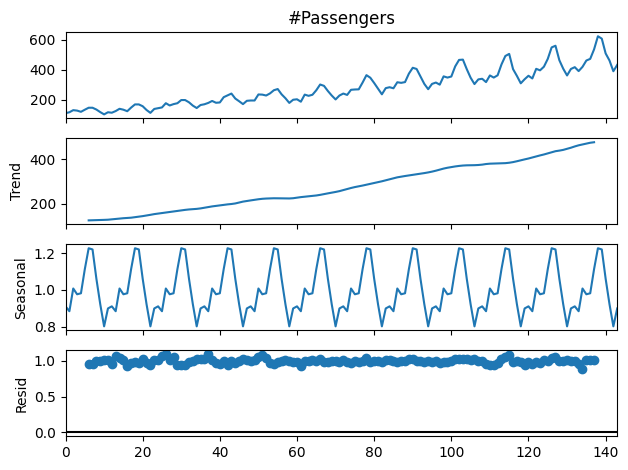

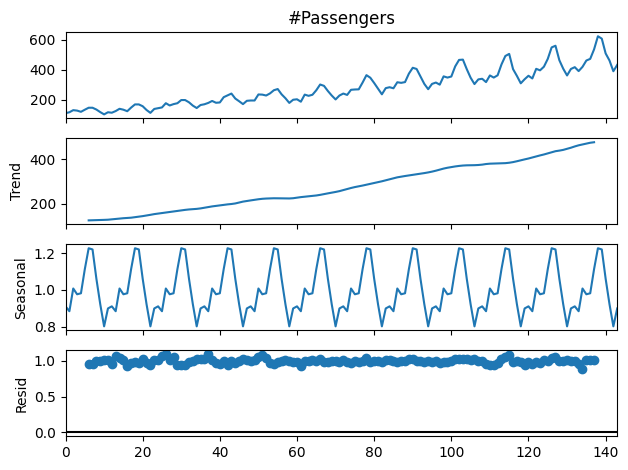

In [11]:
# Decompose the data into trend, seasonality and residuals

decompose = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)
decompose.plot()


<Axes: >

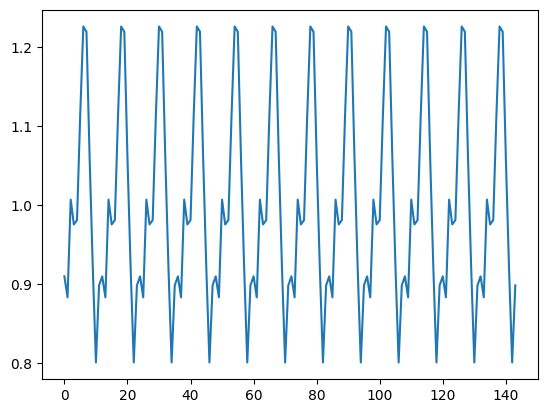

In [12]:
decompose.seasonal.plot()

In [13]:
decompose.resid

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
139   NaN
140   NaN
141   NaN
142   NaN
143   NaN
Name: resid, Length: 144, dtype: float64

c:\Users\Tesla Laptops\miniconda3\envs\tf_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Tesla Laptops\miniconda3\envs\tf_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Tesla Laptops\miniconda3\envs\tf_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1960-01-01    433.451927
1960-02-01    417.984221
1960-03-01    426.393139
1960-04-01    421.821685
1960-05-01    424.306927
1960-06-01    422.955841
1960-07-01    423.690350
1960-08-01    423.291039
1960-09-01    423.508122
1960-10-01    423.390106
1960-11-01    423.454265
1960-12-01    423.419385
Freq: MS, Name: predicted_mean, dtype: float64


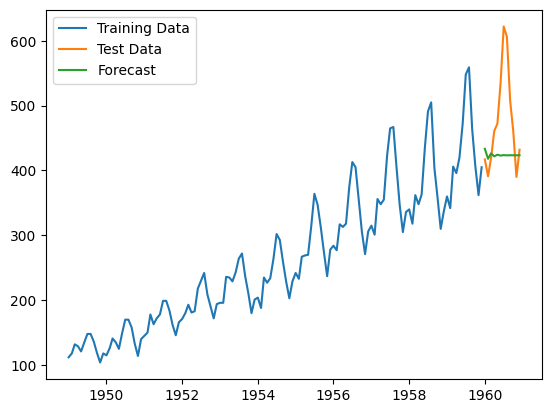

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the AirPassengers dataset
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Split the data into training and testing sets
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01':]

# Fit an ARIMA model to the training data
model = ARIMA(train, order=(1, 1, 1)).fit()

# Make predictions for the testing data
forecast = model.forecast(steps=len(test))

# Print the forecasted values
print(forecast)

# Plot the forecasted values against the actual values
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [24]:
pip install xgboost

  Using cached xgboost-1.7.5-py3-none-win_amd64.whl (70.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename the Passengers column to #Passengers
df = df.rename(columns={'Passengers': '#Passengers'})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Train a linear regression model on the training data
X_train, y_train = train_data.index.values.reshape(-1,1), train_data['#Passengers'].values
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the testing data
X_test, y_test = test_data.index.values.reshape(-1,1), test_data['#Passengers'].values.reshape(-1,1)
y_pred = reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")


In [6]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename the Passengers column to #Passengers
df = df.rename(columns={'Passengers': '#Passengers'})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Train an SVR model on the training data
X_train, y_train = train_data.index.values.reshape(-1,1), train_data['#Passengers'].values
reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train, y_train)

# Make predictions on the testing data
X_test, y_test = test_data.index.values.reshape(-1,1), test_data['#Passengers'].values
y_pred = reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")


Mean squared error: 49792.83602649902


Mean squared error: 49792.83602649902


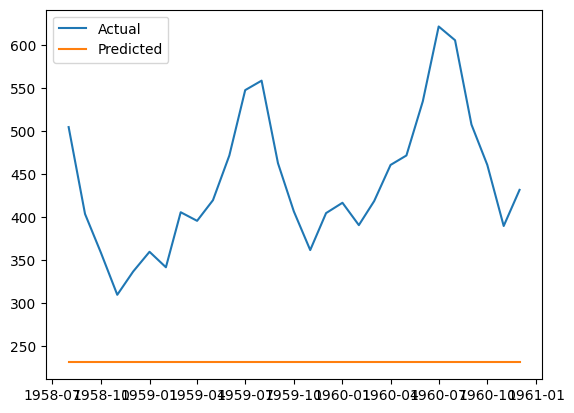

In [7]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename the Passengers column to #Passengers
df = df.rename(columns={'Passengers': '#Passengers'})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Train an SVR model on the training data
X_train, y_train = train_data.index.values.reshape(-1,1), train_data['#Passengers'].values
reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1).fit(X_train, y_train)

# Make predictions on the testing data
X_test, y_test = test_data.index.values.reshape(-1,1), test_data['#Passengers'].values
y_pred = reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

# Plot the actual and predicted passenger data
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.legend()
plt.show()


Mean squared error: 8658.948631778483


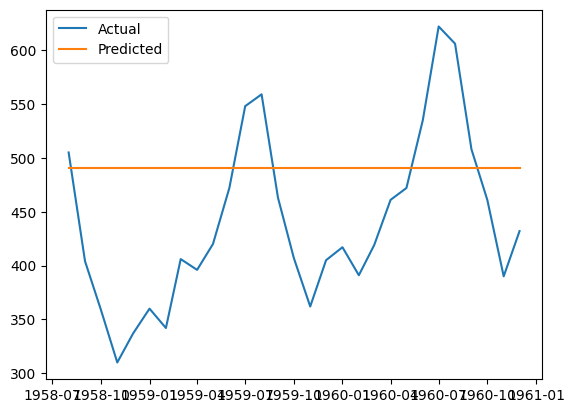

In [9]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename the Passengers column to #Passengers
df = df.rename(columns={'Passengers': '#Passengers'})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Train a Gradient Boosting model on the training data
X_train, y_train = train_data.index.values.reshape(-1,1), train_data['#Passengers'].values
reg = GradientBoostingRegressor(n_estimators=500).fit(X_train, y_train)

# Make predictions on the testing data
X_test, y_test = test_data.index.values.reshape(-1,1), test_data['#Passengers'].values
y_pred = reg.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

# Plot the actual and predicted passenger data
plt.plot(test_data.index, y_test, label='Actual')
plt.plot(test_data.index, y_pred, label='Predicted')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename the Passengers column to #Passengers
df = df.rename(columns={'Passengers': '#Passengers'})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Create a function to prepare the data for the neural network
def prepare_data(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

# Prepare the training and testing data for the neural network
lag = 3
X_train, y_train = prepare_data(train_data_scaled, lag)
X_test, y_test = prepare_data(test_data_scaled, lag)

# Create a neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the neural network model on the training data
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the testing data using the trained model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Epoch 1/10
4/4 [==============================] - 5s 9ms/step - loss: 0.1640
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 0.1301
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0960
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0622
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.0357
Epoch 6/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0228
Epoch 7/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0255
Epoch 8/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0287
Epoch 9/10
4/4 [==============================] - 0s 9ms/step - loss: 0.0232
Epoch 10/10
1/1 [==============================] - 1s 980ms/step
Mean squared error: 11558.426524337452


Epoch 1/100
4/4 [==============================] - 5s 9ms/step - loss: 0.1580
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.1240
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0892
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0578
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0323
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0242
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0287
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0280
Epoch 9/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0219
Epoch 10/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0205
Epoch 11/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0197
Epoch 12/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0187
Epoch 13/100
4/4 [==============================] - 0s

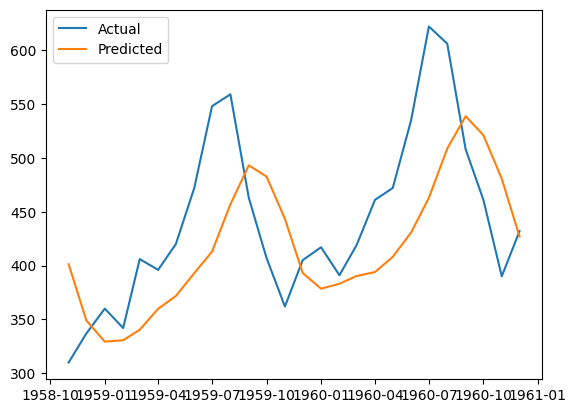

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Rename the Passengers column to #Passengers
df = df.rename(columns={'Passengers': '#Passengers'})

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Create a function to prepare the data for the neural network
def prepare_data(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    y = np.reshape(y, (y.shape[0], 1))
    return X, y

# Prepare the training and testing data for the neural network
lag = 3
X_train, y_train = prepare_data(train_data_scaled, lag)
X_test, y_test = prepare_data(test_data_scaled, lag)

# Create a neural network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the neural network model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the testing data using the trained model
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

# Plot the actual and predicted passenger data
plt.plot(test_data.index[lag:], y_test, label='Actual')
plt.plot(test_data.index[lag:], y_pred, label='Predicted')
plt.legend()
plt.show()


Outclass training using codeium, i built all these 